# 在线教育数据分析

In [6]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False


In [9]:
DATA_DIR = ".data/"

In [10]:
# 读数据
course_chapter = pd.read_csv(os.path.join(DATA_DIR, 'course_chapter.csv'))
course_task = pd.read_csv(os.path.join(DATA_DIR, 'course_task.csv'))

In [ ]:
course_task

,id,courseId,fromCourseSetId,seq,categoryId,activityId,title,isFree,isOptional,startTime,...,updatedTime,mode,isLesson,number,type,mediaSource,length,maxOnlineNum,copyId,migrateLessonId
0,11,3,3,5,13,11,引言,0,0,0,...,1620982123,lesson,1,2,video,self,564,0,0,0
1,12,3,3,7,15,12,基本术语,0,0,0,...,1620982123,lesson,1,3,video,self,562,0,0,0
2,13,3,3,9,16,13,假设空间,0,0,0,...,1560909861,lesson,1,4,video,self,361,0,0,0
3,14,3,3,11,17,14,归纳偏好,0,0,0,...,1560909861,lesson,1,5,video,self,171,0,0,0
4,17,3,3,16,21,17,经验误差与过拟合,0,0,0,...,1560909861,lesson,1,7,video,self,447,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259233,301498,10689,10446,104,368665,301517,1.1.3爬虫合法性,0,0,0,...,1690363354,NaN,1,48,video,self,186,0,0,0
259234,301499,10689,10446,106,368666,301518,1.2认识反爬虫,0,0,0,...,1690363354,NaN,1,49,video,self,422,0,0,0
259235,301500,10689,10446,108,368667,301519,1.3配置Python爬虫环境,0,0,0,...,1690363354,NaN,1,50,video,self,177,0,0,0
259236,301501,10689,10446,3,368668,301520,2.1.1网络传输模型,0,0,0,...,1690363354,NaN,1,1,video,self,450,0,0,0


In [11]:
classroom_member = pd.read_csv(os.path.join(DATA_DIR, 'classroom_member.csv'))
classroom_courses = pd.read_csv(os.path.join(DATA_DIR, 'classroom_courses.csv'))

In [30]:
user_learn_statistics_total = pd.read_csv(os.path.join(DATA_DIR, 'user_learn_statistics_total.csv'))
activity_learn_log = pd.read_csv(os.path.join(DATA_DIR, 'activity_learn_log.csv'))
log = pd.read_csv(os.path.join(DATA_DIR, 'log.csv'))

In [12]:
testpaper = pd.read_csv(os.path.join(DATA_DIR, 'testpaper.csv'))
testpaper_result = pd.read_csv(os.path.join(DATA_DIR, 'testpaper_result.csv'))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd7 in position 225: invalid continuation byte

一个直白的问题：哪些学生学习效果好？

数据检视和预处理

In [16]:
# 数据清洗
# 建一个list，储存所有表的名字，名字就是.data文件夹下的文件名

file_list = [i[:-4] for i in os.listdir(DATA_DIR) if i[-4:] == ".csv"]
file_list

['activity_learn_log',
 'classroom_courses',
 'classroom_member',
 'course_chapter',
 'course_task',
 'log',
 'testpaper',
 'testpaper_result',
 'user_learn_statistics_total']

In [27]:
# 编写一个检视函数，遍历每个表，检视各字段缺失值、重复值，并可视化结果
import enum


def inspect_and_visualize_tables(dataframes):
    """
    检视并可视化给定数据框列表中的缺失值和重复值。

    参数:
    dataframes (dict): 一个字典，键为数据框名称，值为数据框对象。
    """
     # 计算总行数以确定图形大小
    num_tables = len(dataframes)
    fig, axes = plt.subplots(num_tables, 1, figsize=(10, num_tables * 3))

    if num_tables == 1:
        axes = [axes]  # 如果只有一个表，将axes转换为数组以便统一处理

    for i,name in enumerate(dataframes):
        try:
            df = eval(name)
            print(f"检查表: {name}\n")
        except NameError:
            print("No table named", name)
            print("")
            continue

        # 计算缺失值和重复值的占比
        # 重复值以id统计
        missing_values = df.isnull().sum() / len(df) * 100
        duplicate_values = df['id'].duplicated().sum() / len(df) * 100 if len(df) > 0 else 0

        # 创建条形图
        ax = axes[i]
        missing_values.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7, label='缺失值')
        ax.bar(missing_values.index, duplicate_values, bottom=missing_values, color='salmon', alpha=0.7, edgecolor='black', label='重复值')

        # 设置图形属性
        ax.set_title(f'{name} 缺失值和重复值占比')
        # ax.set_xlabel('字段')
        ax.set_ylabel('占比 (%)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.legend()

        # 打印缺失值情况
        print(f"缺失值情况:\n{missing_values}\n")
        print(f"重复值行数: {duplicate_values}\n")

    plt.tight_layout()
    plt.show()

检查表: activity_learn_log

缺失值情况:
id              0.0
activityId      0.0
courseTaskId    0.0
userId          0.0
mediaType       0.0
event           0.0
data            0.0
learnedTime     0.0
createdTime     0.0
dtype: float64

重复值行数: 0.0

检查表: classroom_courses

缺失值情况:
id                0.0
classroomId       0.0
courseId          0.0
parentCourseId    0.0
seq               0.0
disabled          0.0
courseSetId       0.0
dtype: float64

重复值行数: 0.0

检查表: classroom_member

缺失值情况:
id                   0.00000
classroomId          0.00000
userId               0.00000
orderId              0.00000
levelId              0.00000
noteNum              0.00000
threadNum            0.00000
locked               0.00000
role                 0.00000
createdTime          0.00000
lastLearnTime       44.17063
learnedNum          44.17063
updatedTime          0.00000
deadline             0.00000
refundDeadline       0.00000
deadlineNotified     0.00000
dtype: float64

重复值行数: 0.0

检查表: course_chapter

缺失值情

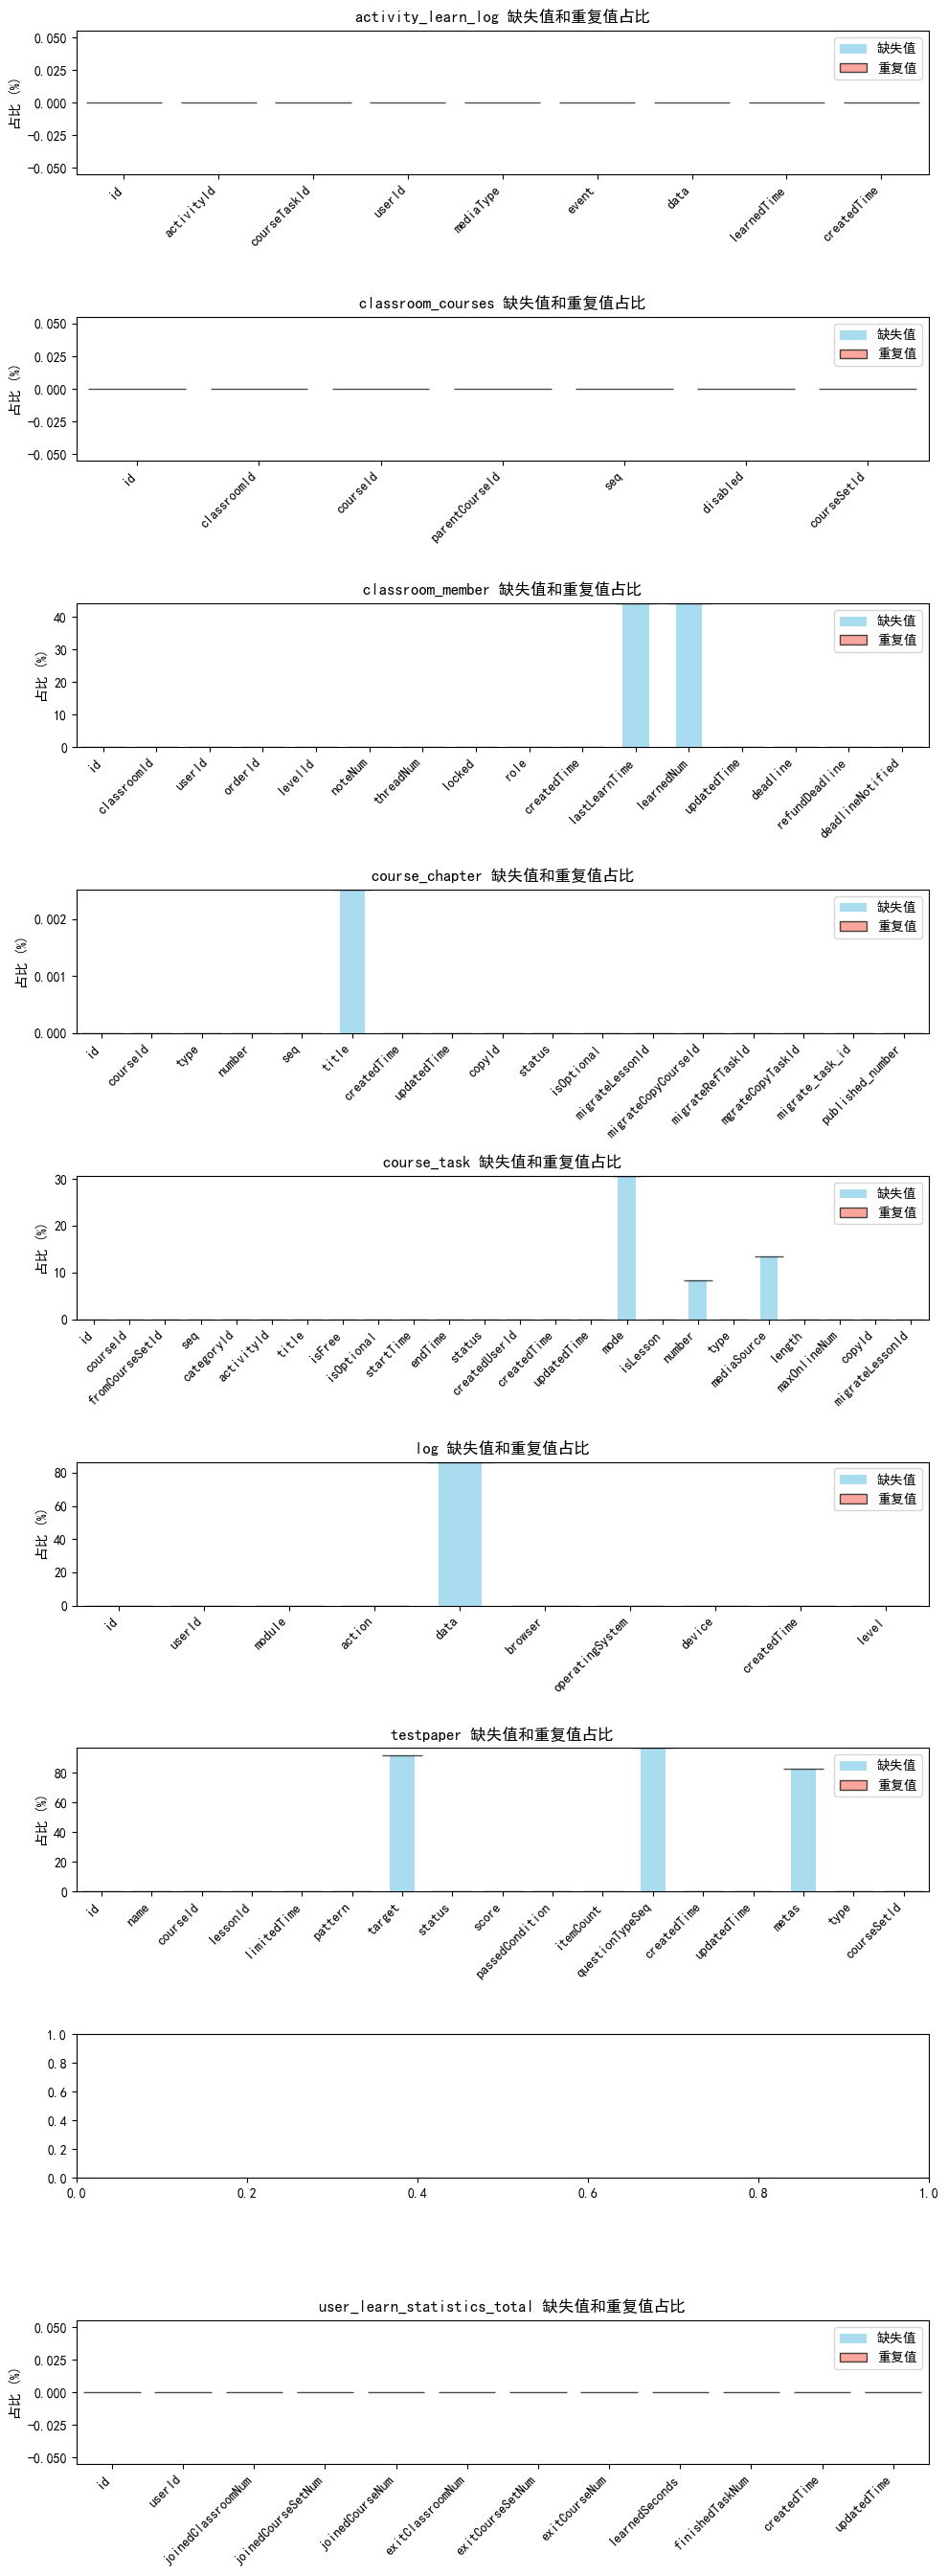

In [31]:

# 示例使用
if __name__ == "__main__":

    inspect_and_visualize_tables(file_list)



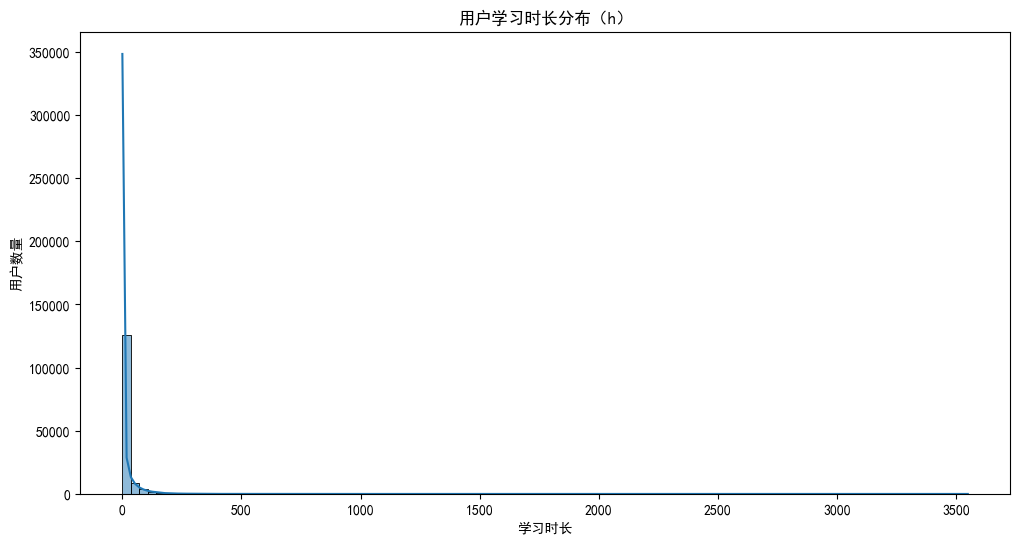

In [ ]:
# 统计用户每日学习时长
plt.figure(figsize=(12,6))
sns.histplot(data=user_learn_statistics_total, x=user_learn_statistics_total['learnedSeconds'] / 3600, bins=100, kde=True)
plt.title('用户学习时长分布（h）')
plt.xlabel('学习时长')
plt.ylabel('用户数量')
plt.show()

In [ ]:
# 任务完成率与考试成绩关系（Plotly 散点图）
# 计算任务完成率与平均分
merged_data = pd.merge(
    activity_learn_log,
    testpaper_result,
    on=['userId', 'courseId'],
    how='inner'
)

task_completion = merged_data.groupby('userId').agg(
    tasks_completed=('finishedTaskNum', 'max'),
    avg_score=('score', 'mean')
).reset_index()

fig = px.scatter(
    task_completion,
    x='tasks_completed',
    y='avg_score',
    trendline='ols',
    title='任务完成数量与考试成绩关系'
)
fig.show()

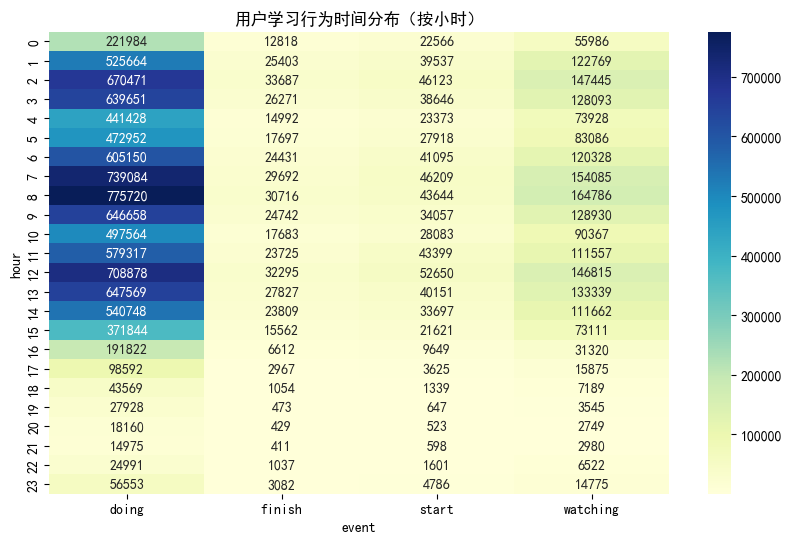

In [38]:
# 转换时间戳为小时
activity_learn_log['hour'] = pd.to_datetime(
    activity_learn_log['createdTime'], unit='s'
).dt.hour

# 绘制热力图
heatmap_data = activity_learn_log.pivot_table(
    index='hour', columns='event', values='id', aggfunc='count', fill_value=0
)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('用户学习行为时间分布（按小时）')
plt.show()

In [ ]:
from pyecharts.charts import Radar

# 按班级统计学习指标
classroom_stats = merged_data.groupby('classroomId').agg(
    avg_score=('score', 'mean'),
    avg_learn_time=('learnedSeconds', 'mean'),
    task_completion_rate=('finishedTaskNum', 'mean')
).reset_index()

# 雷达图参数
schema = [
    {'name': '平均成绩', 'max': 100},
    {'name': '平均学习时长', 'max': 5000},
    {'name': '任务完成率', 'max': 1}
]
data = [[classroom_stats.iloc[0][['avg_score', 'avg_learn_time', 'task_completion_rate']].tolist()]]

radar = Radar()
radar.add_schema(schema)
radar.add("班级A", data)
radar.render_notebook()